In [112]:
import matplotlib.pyplot as plt # plots
import cartopy.crs as ccrs      # map projections
import pandas as pd             # large arrays
import numpy as np              # large arrays and matrices
import xarray as xr             # major tool to work with NetCDF data!

In [113]:
from util.gamap_colormap import WhGrYlRd

In [114]:
# load data
fname = '/home/msadiq/Desktop/co2/data/emission/MASKS/nc/giorgi/MASK11_1.0x1.0.nc'
ds = xr.open_dataset(fname)
ds

<xarray.Dataset>
Dimensions:  (lat: 180, lon: 360, time: 1)
Coordinates:
  * lon      (lon) float32 -179.5 -178.5 -177.5 -176.5 ... 177.5 178.5 179.5
  * lat      (lat) float32 -89.5 -88.5 -87.5 -86.5 -85.5 ... 86.5 87.5 88.5 89.5
  * time     (time) datetime64[ns] 2000-01-01
Data variables:
    MASK     (time, lat, lon) float32 ...
Attributes:
    CDI:          Climate Data Interface version 1.5.5 (http://code.zmaw.de/p...
    Conventions:  COARDS
    history:      made by m.sadiq 2020
    Title:        COARDS/netCDF file created by BPCH2COARDS (GAMAP v2-03+)
    Model:        GENERIC
    Delta_Lon:    1.0
    Delta_Lat:    1.0
    NLayers:      1
    Start_Date:   19850101
    Start_Time:   0
    End_Date:     19860101
    End_Time:     0
    Delta_Time:   240000
    Grid:         GEN_1x1
    CDO:          Climate Data Operators version 1.5.5 (http://code.zmaw.de/p...
    comment:      region masks, by m.sadiq 2020

In [115]:
#specify year and month of emission needed
year_sim = np.array('2017',dtype='datetime64[Y]')
month_emission = np.array('2017-04',dtype='datetime64[M]')

In [116]:
# days in year 
days = np.arange(year_sim, year_sim + 1, dtype='datetime64[D]')
days_in_ns = np.array(days, dtype='M8[ns]') # unit conversion to match source

In [117]:
lon_len = len(ds.lon)
lat_len = len(ds.lat)
time_len = len(days_in_ns)

emi_range = np.arange(month_emission,month_emission+1,dtype='datetime64[D]')

In [118]:
target = xr.Dataset({"MASK": (("time", "lat", "lon"), 
                              np.zeros(lon_len*lat_len*time_len).reshape(time_len,lat_len,lon_len))},)
target.coords['lon'] = ds.coords['lon']
target.coords['lat'] = ds.coords['lat']
target.coords['time'] = days_in_ns
target = target.astype(dtype='float32')
target['MASK'].loc[emi_range,:,:] = ds['MASK'].values
target

<xarray.Dataset>
Dimensions:  (lat: 180, lon: 360, time: 365)
Coordinates:
  * lon      (lon) float32 -179.5 -178.5 -177.5 -176.5 ... 177.5 178.5 179.5
  * lat      (lat) float32 -89.5 -88.5 -87.5 -86.5 -85.5 ... 86.5 87.5 88.5 89.5
  * time     (time) datetime64[ns] 2017-01-01 2017-01-02 ... 2017-12-31
Data variables:
    MASK     (time, lat, lon) float32 0.0 0.0 0.0 0.0 0.0 ... 0.0 0.0 0.0 0.0

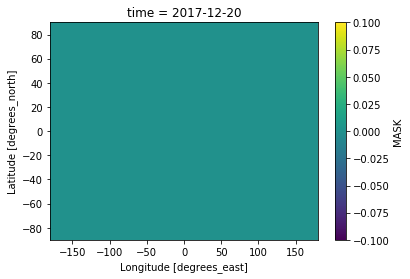

In [121]:
target['MASK'].sel(time=np.datetime64('2017-12-20')).plot()